In [1]:
import pybdsim as _bd
import pymad8 as _m8
import matplotlib.pyplot as _plt

Welcome to JupyROOT 6.29/01


In [2]:
mad8twiss = "../01_mad8/TWISS_CL_T20"
mad8opt = _m8.Output(mad8twiss)

bdsimOptics = "../04_dataLocal/T20_simple_optics.root"
bdsinst = _bd._General.CheckItsBDSAsciiData(bdsimOptics)
bdsopt = _bd.Compare._Mad8BdsimComparison._GetBDSIMOptics(bdsinst)

beamParams = {'esprd': 1e-4, 'particle': "electron", 'ex': 1e-8, 'ey': 1e-8}

Mad8.readTwissFile > nrec=878
REBDSIM analysis file - using RebdsimFile


In [16]:
def PlotBeta(mad8opt, bdsopt, beamParams, figsize=(10, 4), xlim=(0, 0), **kwargs):
    
    plot_info_dict = {"bdsimdata": ("Beta_x", "Beta_y"),
                      "bdsimerror": ("Sigma_Beta_x", "Sigma_Beta_y"),
                      "mad8": ("BETX", "BETY"),
                      "legend": (r'$\beta_{x}$', r'$\beta_{y}$'),
                      "xlabel": "S / m",
                      "ylabel": r"$\beta_{x,y}$ / m",
                      "title": "Beta"}
    
    # Get the initial N for the bdsim
    N = str(int(bdsopt['Npart'][0]))  # number of primaries.

    # labels for plot legends
    mad8legendx = r'MAD8 ' + plot_info_dict['legend'][0]
    mad8legendy = r'MAD8 ' + plot_info_dict['legend'][1]
    bdslegendx = r'BDSIM ' + plot_info_dict['legend'][0] + ' ; N = ' + N
    bdslegendy = r'BDSIM ' + plot_info_dict['legend'][1] + ' ; N = ' + N
    
    mad8Xdata = mad8opt.getColumnsByKeys(plot_info_dict['mad8'][0])
    mad8Ydata = mad8opt.getColumnsByKeys(plot_info_dict['mad8'][1])
    mad8s = mad8opt.getColumnsByKeys('S')
    
    # the figure
    plot = _plt.figure(plot_info_dict["title"], figsize=figsize, **kwargs)

    # mad8 plot
    _plt.plot(mad8s, mad8Xdata, 'b--', label=mad8legendx)
    _plt.plot(mad8s, mad8Ydata, 'g--', label=mad8legendy)

    # bds plot
    _plt.errorbar(bdsopt['S'], bdsopt[plot_info_dict['bdsimdata'][0]], bdsopt[plot_info_dict['bdsimerror'][0]],
                      label=bdslegendx, capsize=3, ls='', marker='x', color='b', **kwargs)
    _plt.errorbar(bdsopt['S'], bdsopt[plot_info_dict['bdsimdata'][1]], bdsopt[plot_info_dict['bdsimerror'][1]],
                      label=bdslegendy, capsize=3, ls='', marker='x', color='g', **kwargs)

    # Set axis labels and draw legend
    axes = _plt.gcf().gca()
    axes.set_ylabel(plot_info_dict['ylabel'])
    axes.set_xlabel(plot_info_dict['xlabel'])
    axes.legend(loc='best', ncol=2)
    axes.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

    _m8.Plot.AddMachineLatticeToFigure(plot, mad8opt)

    plot.sca(plot.axes[0])
    #_plt.show(block=False)

    if xlim != (0, 0):
        _plt.xlim(xlim)
    #_plt.show(block=False)

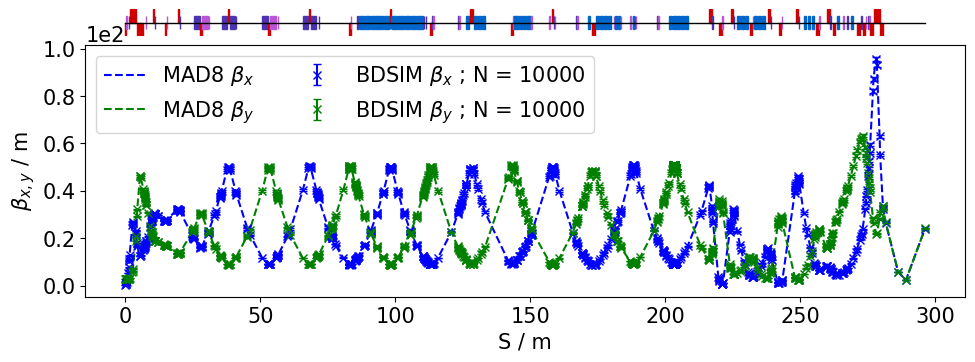

In [18]:
_plt.rcParams['font.size'] = 15

PlotBeta(mad8opt, bdsopt, beamParams)#, figsize=(10,4))
